In [1]:
from rich.console import Console
from rich.traceback import install

install(show_locals=True)

console = Console()

In [2]:
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from csv_loader import CSVLoader

In [3]:
sns.set_theme(style="darkgrid")

In [4]:
FILE_DIR = "../../Dataset/Tenders WA UTF8.csv"

In [5]:
# Load the data
df = pd.read_csv(FILE_DIR)

In [6]:
headers = df.columns.tolist()

In [7]:
headers.remove("Description")

In [8]:
# loader = CSVLoader(file_path="../../Dataset/Contracts_Dataset_With_Extract.csv")
loader = CSVLoader(file_path=FILE_DIR, metadata_columns=headers)

data = loader.load()

In [9]:
print(len(data))

26145


In [10]:
data[0]

Document(page_content='\ufeffClient Agency: Animal Resources Centre\nClient Agency Address: 3 Farm Road Murdoch WA 6150\nDeveloping Agency Parent: Animal Resources Authority\nReference Number: ARA201901891\nType of Work: Goods and Services\nContract Title: Supply and Delivery of Aspen Bedding Material\nDescription: <p><span style="font-size:10pt"><span style="color:#333333"><span style="font-family:&quot;Arial&quot;,sans-serif">The Customer requires a Contractor to provide bedding material made from Aspen and must be suitable for its rats and mice.</span></span></span></p>    <p><span style="font-size:10pt"><span style="color:#333333"><span style="font-family:&quot;Arial&quot;,sans-serif">The bedding material product must be made entirely from the Aspen species Populus tremula.</span></span></span></p>\nTender Closing Date: 9/07/2019\nUNSPSC Code: 41102614\nUNSPSC Title: Research animal bedding material\nProcurement Method: Open\nPeriod Contract: One Off\nCUA Contract: No\nOriginal Con

In [11]:
# def split_docs(documents, chunk_size=2048, chunk_overlap=20):
#     text_splitter = RecursiveCharacterTextSplitter(
#         chunk_size=chunk_size, chunk_overlap=chunk_overlap
#     )
#     docs = text_splitter.split_documents(documents)
#     return docs


# docs = split_docs(data)
# print(len(docs))

In [12]:
from langchain.schema import Document


def chunk_docs(
    docs: list[Document], max_chunk_size: int, overlap: int = -1
) -> list[Document]:
    """
    Chunk documents into smaller documents
    :param docs: Documents
    :param metadatas: Documents metadata
    :param max_chunk_size:
    :param overlap: - if -1 then overlap is 10% of max_chunk_size
    :return:
    """
    _overlap = overlap
    if _overlap == -1:
        _overlap = int(max_chunk_size * 0.1)
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=max_chunk_size, chunk_overlap=_overlap, add_start_index=True
    )
    _out_docs = text_splitter.split_documents(docs)
    return _out_docs


docs = chunk_docs(data, 512)

In [13]:
print(docs[0:4])

[Document(page_content='\ufeffClient Agency: Animal Resources Centre\nClient Agency Address: 3 Farm Road Murdoch WA 6150\nDeveloping Agency Parent: Animal Resources Authority\nReference Number: ARA201901891\nType of Work: Goods and Services\nContract Title: Supply and Delivery of Aspen Bedding Material', metadata={'source': '../../Dataset/Tenders WA UTF8.csv', 'row': 0, 'Client Agency Address': '3 Farm Road Murdoch WA 6150', 'Developing Agency Parent': 'Animal Resources Authority', 'Reference Number': 'ARA201901891', 'Type of Work': 'Goods and Services', 'Contract Title': 'Supply and Delivery of Aspen Bedding Material', 'Tender Closing Date': '9/07/2019', 'UNSPSC Code': '41102614', 'UNSPSC Title': 'Research animal bedding material', 'Procurement Method': 'Open', 'Period Contract': 'One Off', 'CUA Contract': 'No', 'Original Contract Value': '500000', 'Revised Contract Value': '500000', 'Region/s': 'Perth Metropolitan', 'Awarded Date': '23/10/2019', 'Start Date': '24/10/2019', 'Initial E

In [14]:
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

In [ ]:
# def split_list(input_list, chunk_size):
#     for i in range(0, len(input_list), chunk_size):
#         yield input_list[i : i + chunk_size]


# split_docs_chunked = split_list(docs, 41000)

# for split_docs_chunk in split_docs_chunked:
#     vectordb = Chroma.from_documents(
#         documents=split_docs_chunk,
#         embedding=embeddings,
#         persist_directory="./chroma_db",
#         collection_metadata={"hnsw:space": "cosine"},
#     )
#     vectordb.persist()

In [16]:
print(len(docs))

109852


In [17]:
db_disk = Chroma(
    persist_directory="./chroma_db",
    embedding_function=embeddings,
    collection_metadata={"hnsw:space": "cosine"},
)

In [18]:
query = "CCTV"
query_embedding = embeddings.embed_query(query)
matching_docs = db_disk.similarity_search_by_vector_with_relevance_scores(
    query_embedding, k=105000
)

In [19]:
result_dict = {}
for doc, score in matching_docs:
    row_id = doc.metadata["row"]
    if row_id not in result_dict:
        result_dict[row_id] = score
    else:
        result_dict[row_id] = min(result_dict[row_id], score)

In [20]:
len(result_dict)

24857

In [ ]:
# Create a list of sorted keys and values
keys = [str(key) for key in result_dict.keys()]
values = [result_dict[int(key)] for key in keys]

# Plot the dictionary
plt.plot(keys, values)

# Add labels and title
plt.xlabel("Row ID")
plt.ylabel("Similarity Score")

# Display the plot
plt.show()

In [41]:
keys

dict_keys([20635, 20642, 20641, 20644, 20645, 20643, 18973, 18834, 25159, 24962, 2250, 19860, 21279, 24829, 19615, 19753, 24644, 25965, 21616, 2614, 25154, 24963, 8382, 21107, 12485, 6828, 24046, 24047, 24049, 24050, 24048, 21115, 25262, 25256, 23567, 23460, 727, 8816, 7759, 11377, 24815, 20258, 25285, 23793, 23792, 23566, 20156, 12563, 1300, 12203, 25275, 17326, 17439, 1395, 19363, 25473, 25471, 25856, 24572, 19729, 22757, 22758, 22760, 22759, 22762, 22761, 22763, 22764, 22765, 22766, 22767, 22772, 22773, 22774, 22775, 22777, 22776, 22778, 22779, 22780, 22781, 22782, 22783, 22784, 25569, 25568, 25564, 25563, 25565, 25562, 25566, 25567, 25260, 21669, 30, 25642, 25284, 8559, 25268, 19428, 25303, 21987, 9343, 16183, 19442, 750, 21864, 25711, 19312, 13445, 6728, 13483, 13507, 18460, 19560, 19969, 20270, 20919, 17738, 25267, 616, 8735, 12011, 25680, 6840, 19361, 19736, 8543, 23865, 25307, 23908, 19631, 12241, 7550, 7551, 25302, 25297, 18915, 22242, 13881, 25582, 23755, 25383, 22946, 19741,

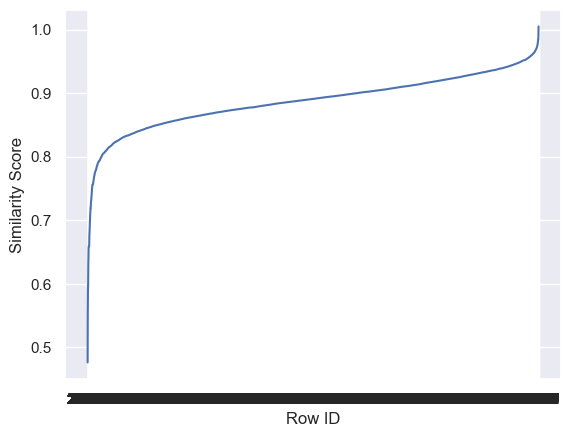

In [55]:
# import numpy as np

# # Convert keys and values to numpy arrays
# keys = np.array(list(map(str, result_dict.keys())))
# values = np.array(list(result_dict.values()))

# # Plot the dictionary
# plt.plot(keys, values)

# # Add labels and title
# plt.xlabel("Row ID")
# plt.ylabel("Similarity Score")

# # Display the plot
# plt.show()

In [26]:
import numpy as np
import plotly.express as px

# Convert keys and values to numpy arrays
keys = np.array(list(map(str, result_dict.keys())))
values = 1 - np.array(list(result_dict.values()))
total = np.array(list(range(1, len(keys) + 1)))

# Create a DataFrame
df = pd.DataFrame({"Row ID": keys, "Similarity Score": values, "Total": total})

# Create the plot
fig = px.line(df, x="Row ID", y="Similarity Score", custom_data=["Total"])

fig.update_traces(
    hovertemplate="<br>".join(
        [
            "Row ID: %{x}",
            "Similarity Score: %{y}",
            "Total: %{customdata[0]}",
        ]
    )
)

# Display the plot
fig.show()

In [57]:
len(keys)

26145